In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras_unet_collection import models

from keras.utils import np_utils
from sklearn.utils import shuffle
from matplotlib.font_manager import FontProperties

In [3]:
train_data = np.load("datasets/Amharic character Image dataset/Type-II/train_char/X_train_char.npy")
test_data = np.load("datasets/Amharic character Image dataset/Type-II/test_char/X_test_char.npy")
train_labels = np.load("datasets/Amharic character Image dataset/Type-II/train_char/y_train_char.npy")
test_labels = np.load("datasets/Amharic character Image dataset/Type-II/test_char/y_test_char.npy")

# print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape, sep='\n')

In [5]:
AMHARIC_ALPHABET = ['ሀ',
 'ሁ',
 'ሂ',
 'ሃ',
 'ሄ',
 'ህ',
 'ሆ',
 'ለ',
 'ሉ',
 'ሊ',
 'ላ',
 'ሌ',
 'ል',
 'ሎ',
 'ሐ',
 'ሑ',
 'ሒ',
 'ሓ',
 'ሔ',
 'ሕ',
 'ሖ',
 'መ',
 'ሙ',
 'ሚ',
 'ማ',
 'ሜ',
 'ም',
 'ሞ',
 'ሠ',
 'ሡ',
 'ሢ',
 'ሣ',
 'ሤ',
 'ሥ',
 'ሦ',
 'ረ',
 'ሩ',
 'ሪ',
 'ራ',
 'ሬ',
 'ር',
 'ሮ',
 'ሰ',
 'ሱ',
 'ሲ',
 'ሳ',
 'ሴ',
 'ስ',
 'ሶ',
 'ሸ',
 'ሹ',
 'ሺ',
 'ሻ',
 'ሼ',
 'ሽ',
 'ሾ',
 'ቀ',
 'ቁ',
 'ቂ',
 'ቃ',
 'ቄ',
 'ቅ',
 'ቆ',
 'በ',
 'ቡ',
 'ቢ',
 'ባ',
 'ቤ',
 'ብ',
 'ቦ',
 'ተ',
 'ቱ',
 'ቲ',
 'ታ',
 'ቴ',
 'ት',
 'ቶ',
 'ቸ',
 'ቹ',
 'ቺ',
 'ቻ',
 'ቼ',
 'ች',
 'ቾ',
 'ኀ',
 'ኁ',
 'ኂ',
 'ኃ',
 'ኄ',
 'ኅ',
 'ኆ',
 'ነ',
 'ኑ',
 'ኒ',
 'ና',
 'ኔ',
 'ን',
 'ኖ',
 'ኘ',
 'ኙ',
 'ኚ',
 'ኛ',
 'ኜ',
 'ኝ',
 'ኞ',
 'አ',
 'ኡ',
 'ኢ',
 'ኣ',
 'ኤ',
 'እ',
 'ኦ',
 'ከ',
 'ኩ',
 'ኪ',
 'ካ',
 'ኬ',
 'ክ',
 'ኮ',
 'ኸ',
 'ኹ',
 'ኺ',
 'ኻ',
 'ኼ',
 'ኽ',
 'ኾ',
 'ወ',
 'ዉ',
 'ዊ',
 'ዋ',
 'ዌ',
 'ው',
 'ዎ',
 'ዐ',
 'ዑ',
 'ዒ',
 'ዓ',
 'ዔ',
 'ዕ',
 'ዖ',
 'ዘ',
 'ዙ',
 'ዚ',
 'ዛ',
 'ዜ',
 'ዝ',
 'ዞ',
 'ዠ',
 'ዡ',
 'ዢ',
 'ዣ',
 'ዤ',
 'ዥ',
 'ዦ',
 'የ',
 'ዩ',
 'ዪ',
 'ያ',
 'ዬ',
 'ይ',
 'ዮ',
 'ደ',
 'ዱ',
 'ዲ',
 'ዳ',
 'ዴ',
 'ድ',
 'ዶ',
 'ጀ',
 'ጁ',
 'ጂ',
 'ጃ',
 'ጄ',
 'ጅ',
 'ጆ',
 'ገ',
 'ጉ',
 'ጊ',
 'ጋ',
 'ጌ',
 'ግ',
 'ጎ',
 'ጠ',
 'ጡ',
 'ጢ',
 'ጣ',
 'ጤ',
 'ጥ',
 'ጦ',
 'ጨ',
 'ጩ',
 'ጪ',
 'ጫ',
 'ጬ',
 'ጭ',
 'ጮ',
 'ጰ',
 'ጱ',
 'ጲ',
 'ጳ',
 'ጴ',
 'ጵ',
 'ጶ',
 'ጸ',
 'ጹ',
 'ጺ',
 'ጻ',
 'ጼ',
 'ጽ',
 'ጾ',
 'ፀ',
 'ፁ',
 'ፂ',
 'ፃ',
 'ፄ',
 'ፅ',
 'ፆ',
 'ፈ',
 'ፉ',
 'ፊ',
 'ፋ',
 'ፌ',
 'ፍ',
 'ፎ',
 'ፐ',
 'ፑ',
 'ፒ',
 'ፓ',
 'ፔ',
 'ፕ',
 'ፖ']

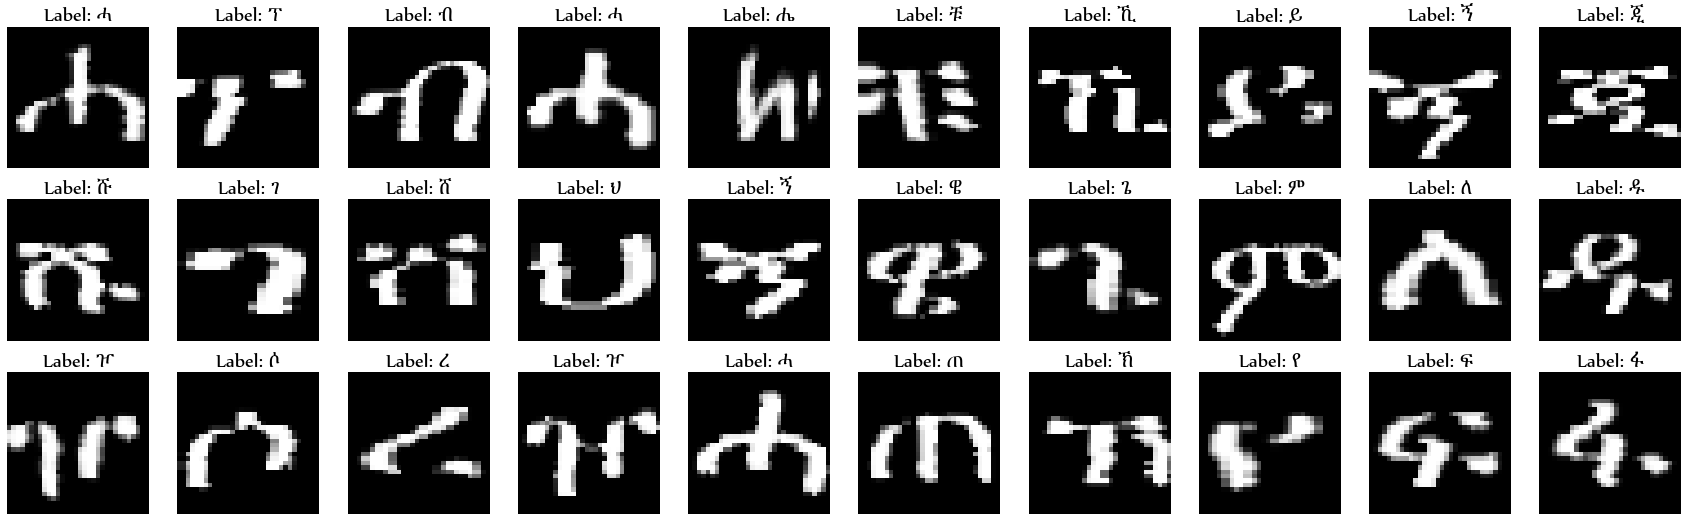

In [6]:
fig, axes = plt.subplots(3,10, figsize=(30,9))
axes = axes.flatten()


prop = FontProperties()
prop.set_file("datasets/Amharic character Image dataset/nyala.ttf")

for i,ax in enumerate(axes):
    img = np.reshape(test_data[i], (32,32))
    ax.imshow(img, cmap='Greys')

    # font = {'fontname':'Nyala'}
    label = AMHARIC_ALPHABET[(np.argmax(np_utils.to_categorical(test_labels)[i]))] # remember it it the indices therefore starts from 0
    ax.set_title("Label: " + label, fontproperties=prop, fontsize=22)
    ax.axis('off')

In [10]:
model = models.unet_2d(
    input_size=(train_data.shape[1:]),  
    filter_num= [16, 32, 64], 
    n_labels= 2, 
    stack_num_down= 2, # number of convolutional layers per downsampling level
    stack_num_up = 2, # number of convolutional layers (after concatenation) per upsampling level
    activation = 'ReLU', 
    output_activation= 'Softmax', 
    batch_norm= False, 
    pool = True, 
    unpool = False, # upsampling with a transpose convolutional layer (2-by-2 convolution kernels with 2 strides; optional batch normalization and activation)
    backbone = None, 
    weights = 'imagenet', 
    freeze_backbone = True, 
    freeze_batch_norm = True, 
    name = 'unet'
)

In [11]:
model.summary()

Model: "unet_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 unet_down0_0 (Conv2D)          (None, 32, 32, 16)   160         ['input_2[0][0]']                
                                                                                                  
 unet_down0_0_activation (ReLU)  (None, 32, 32, 16)  0           ['unet_down0_0[0][0]']           
                                                                                                  
 unet_down0_1 (Conv2D)          (None, 32, 32, 16)   2320        ['unet_down0_0_activation[0][0]']
                                                                                         